In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing required libraries

from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential
from keras.preprocessing import sequence
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

print("Libraries imported")

Libraries imported


In [ ]:
'''
# Merging two data files
data = data2 = "" 
  
# Reading data from first file 
with open('/content/drive/MyDrive/train.ft.txt') as fp: 
    data = fp.read() 
with open('/content/drive/MyDrive/test.ft.txt') as fp: 
    data2 = fp.read() 
# Merging two files into one another file 
data += "\n"
data += data2 
with open ('dataset.txt', 'w') as fp:
  fp.write(data)

print("Dataset is ready to use!!")
'''

'\n# Merging two data files\ndata = data2 = "" \n  \n# Reading data from first file \nwith open(\'/content/drive/MyDrive/train.ft.txt\') as fp: \n    data = fp.read() \nwith open(\'/content/drive/MyDrive/test.ft.txt\') as fp: \n    data2 = fp.read() \n# Merging two files into one another file \ndata += "\n"\ndata += data2 \nwith open (\'dataset.txt\', \'w\') as fp:\n  fp.write(data)\n\nprint("Dataset is ready to use!!")\n'

In [ ]:
# Loading the dataset - Amazon reviews

#input_file = open("train.ft.txt", "rb")
input_file = open("/content/drive/MyDrive/train.ft.txt", "rb")
dataset = input_file.read()
input_file.close()
print("Dataset - Amazon reviews loaded")

# Length of dataset
print("Whole content of dataset: ", len(dataset))
print(" ")

Dataset - Amazon reviews loaded
Whole content of dataset:  1597164432
 


In [ ]:
# _label__1, __label__2 at the beginning of each review
# Splitting each individual review

dataset = dataset.decode("utf-8")
dataset = dataset.splitlines()
print("After splitting the length of dataset: ", len(dataset))
print(" ")
print(dataset[0])

After splitting the length of dataset:  3600000
 
__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^


In [ ]:
# Total 400,000 reviews

# For quick iterations making this dataset as 100,000
dataset = dataset[:100000]

In [ ]:
# Create two lists: labels and reviews

labels = []
reviews = []

for i in dataset:
  separated = i.split(" ",1)
  labels.append(separated[0])
  reviews.append(separated[1])

'''
# Checking the reviews:
for i in range(len(labels)):
  if labels[i] == '__label__1':
    labels[i] = 'Bad Review'
  elif labels[i] == '__label__2':
    labels[i] = 'Good Review'
  else:
    print("uh oh")

for i in range(10):
  print(label[i])

'''

'\n# Checking the reviews:\nfor i in range(len(labels)):\n  if labels[i] == \'__label__1\':\n    labels[i] = \'Bad Review\'\n  elif labels[i] == \'__label__2\':\n    labels[i] = \'Good Review\'\n  else:\n    print("uh oh")\n\nfor i in range(10):\n  print(label[i])\n\n'

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Bag of words Models

# Preparing the features

'''
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer

print(word_tokenize(reviews[0]))
reTokenizer = RegexpTokenizer(r'\w+')
print(reTokenizer.tokenize(reviews[0]))    
'''

"\nimport nltk\nfrom nltk.tokenize import word_tokenize, RegexpTokenizer\n\nprint(word_tokenize(reviews[0]))\nreTokenizer = RegexpTokenizer(r'\\w+')\nprint(reTokenizer.tokenize(reviews[0]))    \n"

In [ ]:
# bag-of-words vocabulary

vocab_size = 3000
max_length = 500

for i in range(len(labels)):
  labels[i] = int(labels[i] == '__label__2')

reTokenizer = RegexpTokenizer(r'\w+')
all_words = []

for i in range(len(reviews)):
  tokens = reTokenizer.tokenize(reviews[i])
  reviews[i] = []
  for word in tokens:
    word = word.lower()
    all_words.append(word)
    reviews[i].append(word)
    
# Extracting the most common words from a list    
all_words = FreqDist(all_words)
all_words = all_words.most_common(vocab_size)
for i in range(len(all_words)):
  all_words[i] = all_words[i][0]

In [ ]:
# Converting Word to int
# i+1 because we want to start at 1

word2int = {all_words[i] : i+1  for i in range(vocab_size)}   
int2word = {x : y  for  y, x in word2int.items()}
dict_as_list = list(word2int)


def review2intlist(rev_text):
    int_list = []
    for word in rev_text:
        if word in word2int.keys():
            int_list.append(word2int[word])
    return int_list


lstm_input = []
for rev in reviews:
  lstm_input.append(np.asarray(review2intlist(rev), dtype=int))
lstm_input = sequence.pad_sequences(lstm_input, maxlen=max_length)

train_proportion = 0.9
train_size = int(train_proportion * len(labels))

x_train, y_train = lstm_input[:train_size], labels[:train_size]
x_test, y_test = lstm_input[train_size:], labels[train_size:]


In [ ]:
print('x_train shape: ',x_train.shape)
print('y_train shape: ',len(y_train))
print('x_test shape: ',x_test.shape)
print('y_test shape: ',len(y_test))

import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_train shape:  (90000, 500)
y_train shape:  90000
x_test shape:  (10000, 500)
y_test shape:  10000


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          900100    
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 500, 200)          241600    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 150)               211200    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 1,353,051
Trainable params: 1,353,051
Non-trainable params: 0
_________________________________________________________________


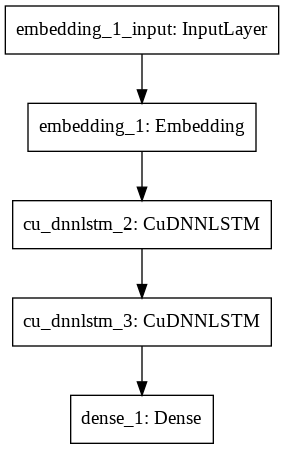

In [ ]:
from keras.layers import Bidirectional, CuDNNLSTM

vocab_size=9000
embedding_size=100
max_length=500

model = Sequential()
model.add(Embedding(input_dim=vocab_size + 1, output_dim=embedding_size, input_length=max_length))
model.add(CuDNNLSTM(200, return_sequences=True))
model.add(CuDNNLSTM(150))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mean_squared_error','mean_absolute_error'])  
model.summary()

# Model Visualization
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')


In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10, verbose=2)


Epoch 1/10
1407/1407 - 321s - loss: 0.3303 - accuracy: 0.8573 - mean_squared_error: 0.1017 - mean_absolute_error: 0.2027 - val_loss: 0.2579 - val_accuracy: 0.8947 - val_mean_squared_error: 0.0772 - val_mean_absolute_error: 0.1664
Epoch 2/10
1407/1407 - 318s - loss: 0.2286 - accuracy: 0.9095 - mean_squared_error: 0.0672 - mean_absolute_error: 0.1342 - val_loss: 0.2567 - val_accuracy: 0.8993 - val_mean_squared_error: 0.0760 - val_mean_absolute_error: 0.1521
Epoch 3/10
1407/1407 - 319s - loss: 0.1946 - accuracy: 0.9240 - mean_squared_error: 0.0565 - mean_absolute_error: 0.1135 - val_loss: 0.2175 - val_accuracy: 0.9101 - val_mean_squared_error: 0.0645 - val_mean_absolute_error: 0.1312
Epoch 4/10
1407/1407 - 319s - loss: 0.1739 - accuracy: 0.9323 - mean_squared_error: 0.0502 - mean_absolute_error: 0.1005 - val_loss: 0.2279 - val_accuracy: 0.9092 - val_mean_squared_error: 0.0672 - val_mean_absolute_error: 0.1311
Epoch 5/10
1407/1407 - 319s - loss: 0.1560 - accuracy: 0.9418 - mean_squared_err

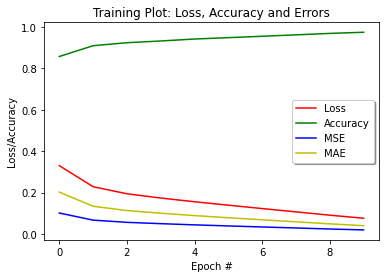

In [ ]:
import matplotlib.pyplot as plt
plt.title("Training Plot: Loss, Accuracy and Errors")
plt.plot(hist.history['loss'], color='r', label="Loss")
plt.plot(hist.history['accuracy'], color='g', label="Accuracy")
plt.plot(hist.history['mean_squared_error'], color='b', label="MSE")
plt.plot(hist.history['mean_absolute_error'], color='y', label="MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='best', shadow=True)

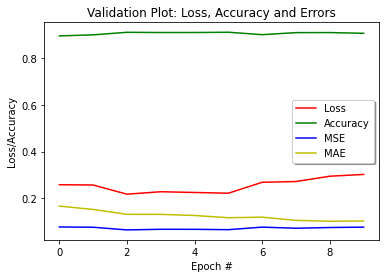

In [ ]:
plt.title("Validation Plot: Loss, Accuracy and Errors")
plt.plot(hist.history['val_loss'], color='r', label="Loss")
plt.plot(hist.history['val_accuracy'], color='g', label="Accuracy")
plt.plot(hist.history['val_mean_squared_error'], color='b', label="MSE")
plt.plot(hist.history['val_mean_absolute_error'], color='y', label="MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='best', shadow=True)

In [ ]:
loss, accuracy, mse, mae = model.evaluate(x_test, y_test)     # Better: split the data into train/test/validate sets
print(" Model Test Accuracy, loss and errors")
print('Model Accuracy: ', accuracy)
print('Model loss: ', loss)
print('Model MSE: ', mse)
print('Model MAE: ', mae)

313/313 [==============================] - 20s 64ms/step - loss: 0.3020 - accuracy: 0.9059 - mean_squared_error: 0.0764 - mean_absolute_error: 0.1027
 Model Test Accuracy, loss and errors
Model Accuracy:  0.9059000015258789
Model loss:  0.30199283361434937
Model MSE:  0.07636214792728424
Model MAE:  0.10268623381853104


In [ ]:
# Model prediction
y_pred = model.predict(x_test)
pred = y_pred.round()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from prettytable import PrettyTable

print('Groud Truth values: ')
print(y_test[1:100])
print('-' * 40)
print('Predicted values: ')
print(pred[1:100])
print('-' * 40)
print("Classification Report: ")
print(classification_report(y_test, y_pred.round()))
print('-' * 40)
print("Confusion Matrix: ")
cfm = confusion_matrix(y_test, pred)
print(cfm)

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1= f1_score(y_test, pred)
# specificity = TN/TN + FP
specificity = cfm[1,1]/(cfm[1,0]+cfm[1,1])

cuDNNLSTM_Table = PrettyTable(['Performance Metrics', '%'])
  
# Add rows
cuDNNLSTM_Table.add_row(['Accuracy ',accuracy])
cuDNNLSTM_Table.add_row(['Precision',precision])
cuDNNLSTM_Table.add_row(['F1-score ',f1])
cuDNNLSTM_Table.add_row(['Recall/Sensitivity   ',recall])
cuDNNLSTM_Table.add_row(['Specificity ',specificity])

print(cuDNNLSTM_Table)




Groud Truth values: 
[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1]
----------------------------------------
Predicted values: 
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
----------------------------------------
Classification Report: 
              precision    recall  f1-score   support

  